In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils # utils.to_categorical
from tensorflow.keras.models import Sequential #모델생성
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리


In [4]:
df= pd.read_csv('data/pima-indians-diabetes.csv',comment='#', header = None)
df.values
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
np.set_printoptions(threshold=sys.maxsize)

In [6]:
# csv 파일을 numpy 배열로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',')
dataset.shape

(768, 9)

In [7]:
# 학습데이터셋(학습용 데이터) : 모델 학습시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터) : 모델 평가시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2.모델구성

In [25]:
model = Sequential()
model.add(Input(shape=(8,)))

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                108       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정


In [26]:
#model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss = 'binary_crossentropy',optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [27]:
hist = model.fit(X_train, y_train,
               epochs=300,
               # batch_size=350,
               # validation_split=0.2 # 검증데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
               verbose=0
               )

In [28]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

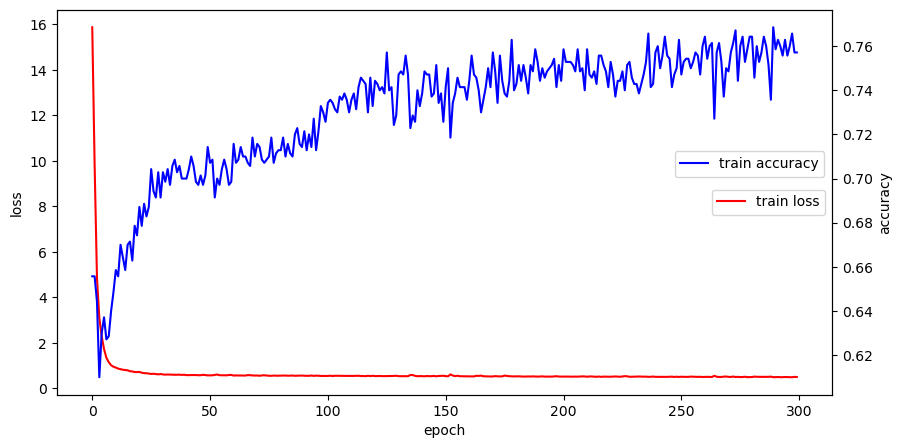

In [41]:
# 학습과정 표시하기(validation dataset 없는경우)
fig,loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'r',label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'],'b',label= 'train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999,0.65))
plt.show()

In [43]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.5241 - binary_accuracy: 0.7471


[0.5241032838821411, 0.7471428513526917]

## 5. 모델 평가

In [46]:

score= model.evaluate(X_train,y_train)
print('loss:{},정확도:{}%'.format(score[0],score[1]*100))

22/22 [==============================] - 0s 1ms/step - loss: 0.5241 - binary_accuracy: 0.7471
loss:0.5241032838821411,정확도:74.71428513526917%


## 6.모델 사용하기

In [47]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [48]:
model.predict([[5,148,72,35,0,33.6,0.627,45]])

1/1 [==============================] - 0s 38ms/step


array([[0.7556377]], dtype=float32)

In [50]:
(model.predict([[4,110,92,0,0,37.6,0.191,30],
               [6,148,72,35,0,33.6,0.6,45]])>0.5).astype(int)

1/1 [==============================] - 0s 39ms/step


array([[0],
       [1]])

## 7. 교차표
- 테스트 데이터셋의 실제값(y_test)과 예측값

In [60]:
y_hat = (model.predict(X_test)>0.5).astype(float)
cnt1=0; cnt2=0; cnt3=0; cnt4=0;
y_hat.shape,y_test.shape
#y_hat = y_hat.reshape
for h,y in zip(y_hat.reshape(-1),y_test.reshape(-1)):
    if h==1.0 and y == 1.0:
        cnt1 += 1
    elif y==1.0 and h==0.0:
        cnt2 += 1
    elif y==0.0 and h==1.0:
        cnt3 += 1
    else:
        cnt4+=1
print(cnt1,cnt2)
print(cnt3,cnt4)

3/3 [==============================] - 0s 2ms/step
14 13
9 32


In [62]:
ctab= pd.crosstab(y_test,y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,32,9
1.0,13,14


# 분류분석
```
1. 데이터셋( 훈련셋600, 검증셋 100, 테스트셋 68으로 분리,종속변수의 원핫 인코딩
2. 모델생성(input 8, target 2): 출력층에서의 활성화 함수 softmax
3. 모델학습과정 설정 (loss = 'categorical_crossentropy' metrics = ['accuracy']
4. 학습 : validation_data=[X_val,y_val] 추가해서 학습
5. 학습평가 : 그래프(hist.history.keys()를 확인후 4가지)
            평가(X_test,Y_test)
             교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측
              0       1
              0.9912 0.00124
```

## 1. 데이터셋( 훈련셋600, 검증셋 100, 테스트셋 68으로 분리,종속변수의 원핫 인코딩)

In [79]:
from tensorflow.keras.utils import to_categorical

In [124]:
# 데이터셋으로 파일 불러오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',')
dataset.shape

(768, 9)

In [125]:
# 훈련데이터셋(학습용 데이터) : 모델 학습시 사용
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
# 검증데이터셋(검증용 데이터) : 모델 검증시 사용
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
# 테스트셋(테스트용 데이터) : 모델 테스트시 사용
X_test = dataset[700:,:-1]
y_test = dataset[700:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [126]:
# 분류분석을 위한 원핫 인코딩
Y_train= to_categorical(y_train,2)
Y_val= to_categorical(y_val,2)
Y_test= to_categorical(y_test,2)

## 2.모델생성(input 8, target 2): 출력층에서의 활성화 함수 softmax

In [132]:

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 12)                108       
                                                                 
 dense_54 (Dense)            (None, 8)                 104       
                                                                 
 dense_55 (Dense)            (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


## 3. 모델학습과정 설정 (loss = 'categorical_crossentropy' metrics = ['accuracy']

In [133]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


## 4. 학습 : validation_data=[X_val,y_val] 추가해서 학습

In [134]:
hist = model.fit(X_train, Y_train,
                epochs = 300,                
                verbose=2,
                validation_data=[X_val,Y_val])

Epoch 1/300
19/19 - 1s - loss: 5.7699 - accuracy: 0.3667 - val_loss: 3.8537 - val_accuracy: 0.4500 - 561ms/epoch - 30ms/step
Epoch 2/300
19/19 - 0s - loss: 2.7430 - accuracy: 0.4083 - val_loss: 1.9995 - val_accuracy: 0.4700 - 52ms/epoch - 3ms/step
Epoch 3/300
19/19 - 0s - loss: 1.7507 - accuracy: 0.4600 - val_loss: 1.4432 - val_accuracy: 0.5100 - 51ms/epoch - 3ms/step
Epoch 4/300
19/19 - 0s - loss: 1.3848 - accuracy: 0.5150 - val_loss: 1.2795 - val_accuracy: 0.4700 - 51ms/epoch - 3ms/step
Epoch 5/300
19/19 - 0s - loss: 1.1690 - accuracy: 0.5333 - val_loss: 1.1552 - val_accuracy: 0.4900 - 49ms/epoch - 3ms/step
Epoch 6/300
19/19 - 0s - loss: 1.0380 - accuracy: 0.5500 - val_loss: 1.0819 - val_accuracy: 0.4800 - 54ms/epoch - 3ms/step
Epoch 7/300
19/19 - 0s - loss: 0.9469 - accuracy: 0.5550 - val_loss: 1.0017 - val_accuracy: 0.5000 - 47ms/epoch - 2ms/step
Epoch 8/300
19/19 - 0s - loss: 0.8734 - accuracy: 0.5683 - val_loss: 0.9402 - val_accuracy: 0.5200 - 50ms/epoch - 3ms/step
Epoch 9/300
19

Epoch 68/300
19/19 - 0s - loss: 0.5742 - accuracy: 0.6767 - val_loss: 0.6062 - val_accuracy: 0.6300 - 50ms/epoch - 3ms/step
Epoch 69/300
19/19 - 0s - loss: 0.5753 - accuracy: 0.6750 - val_loss: 0.6108 - val_accuracy: 0.6500 - 47ms/epoch - 2ms/step
Epoch 70/300
19/19 - 0s - loss: 0.5733 - accuracy: 0.6750 - val_loss: 0.6076 - val_accuracy: 0.6500 - 47ms/epoch - 2ms/step
Epoch 71/300
19/19 - 0s - loss: 0.5730 - accuracy: 0.6767 - val_loss: 0.6127 - val_accuracy: 0.6600 - 54ms/epoch - 3ms/step
Epoch 72/300
19/19 - 0s - loss: 0.5726 - accuracy: 0.6767 - val_loss: 0.6088 - val_accuracy: 0.6500 - 57ms/epoch - 3ms/step
Epoch 73/300
19/19 - 0s - loss: 0.5726 - accuracy: 0.6783 - val_loss: 0.6086 - val_accuracy: 0.6500 - 53ms/epoch - 3ms/step
Epoch 74/300
19/19 - 0s - loss: 0.5727 - accuracy: 0.6833 - val_loss: 0.6054 - val_accuracy: 0.6500 - 79ms/epoch - 4ms/step
Epoch 75/300
19/19 - 0s - loss: 0.5713 - accuracy: 0.6783 - val_loss: 0.6072 - val_accuracy: 0.6500 - 49ms/epoch - 3ms/step
Epoch 76

Epoch 134/300
19/19 - 0s - loss: 0.5603 - accuracy: 0.7000 - val_loss: 0.5629 - val_accuracy: 0.6800 - 50ms/epoch - 3ms/step
Epoch 135/300
19/19 - 0s - loss: 0.5635 - accuracy: 0.6900 - val_loss: 0.5665 - val_accuracy: 0.6700 - 50ms/epoch - 3ms/step
Epoch 136/300
19/19 - 0s - loss: 0.5658 - accuracy: 0.6867 - val_loss: 0.5651 - val_accuracy: 0.6900 - 47ms/epoch - 2ms/step
Epoch 137/300
19/19 - 0s - loss: 0.5600 - accuracy: 0.6983 - val_loss: 0.5637 - val_accuracy: 0.6900 - 50ms/epoch - 3ms/step
Epoch 138/300
19/19 - 0s - loss: 0.5619 - accuracy: 0.6900 - val_loss: 0.5825 - val_accuracy: 0.6700 - 47ms/epoch - 2ms/step
Epoch 139/300
19/19 - 0s - loss: 0.5630 - accuracy: 0.6900 - val_loss: 0.5537 - val_accuracy: 0.6800 - 49ms/epoch - 3ms/step
Epoch 140/300
19/19 - 0s - loss: 0.5613 - accuracy: 0.6850 - val_loss: 0.5745 - val_accuracy: 0.6600 - 48ms/epoch - 3ms/step
Epoch 141/300
19/19 - 0s - loss: 0.5592 - accuracy: 0.7000 - val_loss: 0.5581 - val_accuracy: 0.6900 - 49ms/epoch - 3ms/step


Epoch 200/300
19/19 - 0s - loss: 0.5484 - accuracy: 0.7033 - val_loss: 0.5348 - val_accuracy: 0.7000 - 51ms/epoch - 3ms/step
Epoch 201/300
19/19 - 0s - loss: 0.5502 - accuracy: 0.7050 - val_loss: 0.5452 - val_accuracy: 0.7000 - 51ms/epoch - 3ms/step
Epoch 202/300
19/19 - 0s - loss: 0.5489 - accuracy: 0.7067 - val_loss: 0.5330 - val_accuracy: 0.7000 - 49ms/epoch - 3ms/step
Epoch 203/300
19/19 - 0s - loss: 0.5487 - accuracy: 0.7067 - val_loss: 0.5359 - val_accuracy: 0.7000 - 49ms/epoch - 3ms/step
Epoch 204/300
19/19 - 0s - loss: 0.5469 - accuracy: 0.7000 - val_loss: 0.5354 - val_accuracy: 0.7000 - 50ms/epoch - 3ms/step
Epoch 205/300
19/19 - 0s - loss: 0.5454 - accuracy: 0.7017 - val_loss: 0.5317 - val_accuracy: 0.7000 - 50ms/epoch - 3ms/step
Epoch 206/300
19/19 - 0s - loss: 0.5474 - accuracy: 0.7017 - val_loss: 0.5370 - val_accuracy: 0.7000 - 48ms/epoch - 3ms/step
Epoch 207/300
19/19 - 0s - loss: 0.5460 - accuracy: 0.7083 - val_loss: 0.5312 - val_accuracy: 0.7000 - 48ms/epoch - 3ms/step


Epoch 266/300
19/19 - 0s - loss: 0.5378 - accuracy: 0.7083 - val_loss: 0.5344 - val_accuracy: 0.6900 - 55ms/epoch - 3ms/step
Epoch 267/300
19/19 - 0s - loss: 0.5375 - accuracy: 0.7050 - val_loss: 0.5328 - val_accuracy: 0.7100 - 51ms/epoch - 3ms/step
Epoch 268/300
19/19 - 0s - loss: 0.5384 - accuracy: 0.7150 - val_loss: 0.5351 - val_accuracy: 0.7100 - 48ms/epoch - 3ms/step
Epoch 269/300
19/19 - 0s - loss: 0.5438 - accuracy: 0.7017 - val_loss: 0.5485 - val_accuracy: 0.7100 - 46ms/epoch - 2ms/step
Epoch 270/300
19/19 - 0s - loss: 0.5371 - accuracy: 0.7100 - val_loss: 0.5375 - val_accuracy: 0.7000 - 47ms/epoch - 2ms/step
Epoch 271/300
19/19 - 0s - loss: 0.5392 - accuracy: 0.7033 - val_loss: 0.5384 - val_accuracy: 0.6800 - 48ms/epoch - 3ms/step
Epoch 272/300
19/19 - 0s - loss: 0.5381 - accuracy: 0.7083 - val_loss: 0.5305 - val_accuracy: 0.7100 - 48ms/epoch - 3ms/step
Epoch 273/300
19/19 - 0s - loss: 0.5383 - accuracy: 0.7050 - val_loss: 0.5374 - val_accuracy: 0.6900 - 47ms/epoch - 2ms/step


## 5. 학습평가 : 그래프(hist.history.keys()를 확인후 4가지)
            평가(X_test,Y_test)
             교차표(pd.crosstab 이용)

In [136]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

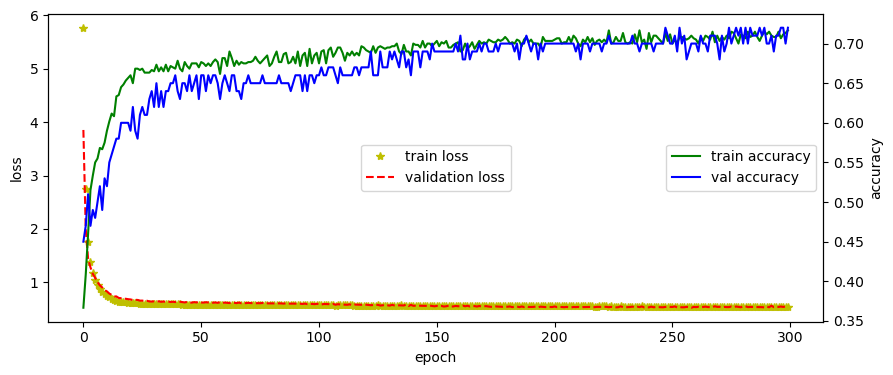

In [140]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

## 6. 모델 사용하기 - 예측
              0       1
              0.9912 0.00124

In [144]:
Y_hat = (model.predict(X_test)>0.5).astype(float)

Y_hat.shape,Y_test.shape
ctab= pd.crosstab(Y_test,Y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

3/3 [==============================] - 0s 2ms/step


ValueError: operands could not be broadcast together with shapes (68,2) (1,136) 